In [55]:
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

In [56]:
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 100
noise = 16

In [57]:
#tworzenie dataset
x,Y  = datasets.make_regression(n_features=1,noise=noise,n_samples=samples, random_state=seed)

In [58]:
#podział dataset na dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
X = poly.fit_transform(x)

### Metoda numeryczna

In [36]:
X

array([[ 1.        ,  2.07800412],
       [ 1.        ,  1.39170547],
       [ 1.        ,  0.62782341],
       [ 1.        ,  1.07277179],
       [ 1.        ,  0.39218485],
       [ 1.        , -0.83147297],
       [ 1.        ,  0.72059195],
       [ 1.        , -1.11251145],
       [ 1.        , -0.71786966],
       [ 1.        , -0.93141709],
       [ 1.        ,  0.75448333],
       [ 1.        , -0.14784469],
       [ 1.        , -1.90294467],
       [ 1.        ,  0.78790338],
       [ 1.        ,  0.36436949],
       [ 1.        ,  1.56133249],
       [ 1.        , -0.99524417],
       [ 1.        , -0.34513437],
       [ 1.        , -1.2073742 ],
       [ 1.        , -0.46217498],
       [ 1.        ,  0.28968037],
       [ 1.        , -0.15275052],
       [ 1.        , -0.01119748],
       [ 1.        ,  0.9428586 ],
       [ 1.        , -0.43062915],
       [ 1.        ,  0.54158395],
       [ 1.        ,  1.49492397],
       [ 1.        ,  0.48479054],
       [ 1.        ,

### $$ L(θ) = \frac{1}{N}(Y - X^T θ)^{T} (Y - X^T θ) $$

In [6]:
def func(w, X, Y):
    y
    
    
    
    
    yxtans = np.subtract(np.reshape(Y,(len(Y),1)), np.matmul(X, np.transpose(np.reshape(w,(1,2)))))
    yxtansyxtans = np.matmul(np.transpose(yxtans),yxtans)
    return yxtansyxtans*(1/len(X_train))
    

In [9]:
start_num = time.time()
for i in range(time_multiplicator):
    ans_num = scipy.optimize.minimize(func,[1,1], args=(X,Y),method="Powell")
num_ex_time = (time.time() - start_num)/time_multiplicator

NameError: name 'func' is not defined

In [10]:
print(ans_num.x[0])

NameError: name 'ans_num' is not defined

### Metoda analityczna

### $$ θ = (X^T X)^{-1} X^T Y $$

In [11]:
#rozbite na części
#X^T Y
xty = np.matmul(np.transpose(X),Y)
#X^T X
xtx = np.matmul(np.transpose(X),X)
#(X^T X)^-1
xtxinv =np.linalg.inv(xtx)
#answer
ans = np.matmul(xtxinv,xty)


In [62]:
X= [[1,1],[1,2],[1,3]]
Y= [1,3,5]

In [63]:
start_ana = time.time()
for i in range(time_multiplicator):
    ans_ana = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
ana_ex_time = (time.time() - start_ana)/time_multiplicator 

In [64]:
print(ans_ana)

[-1.  2.]


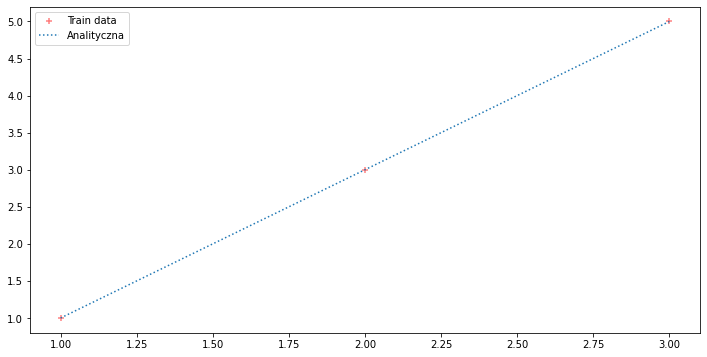

In [65]:
x=[1,2,3]
plt.figure(figsize=(12,6))

plt.scatter(x,Y, color='red', alpha=0.5, marker='+', label="Train data")

plt.plot([min(x),max(x)], [ans_ana[1]*min(x)+ans_ana[0] , ans_ana[1]*max(x)+ans_ana[0]], label="Analityczna", linestyle=":" )

plt.legend()

In [67]:
poly = PolynomialFeatures(2)
x=[[1],[2],[3]]
X = poly.fit_transform(x)
X

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

### Wykres

NameError: name 'ans_num' is not defined

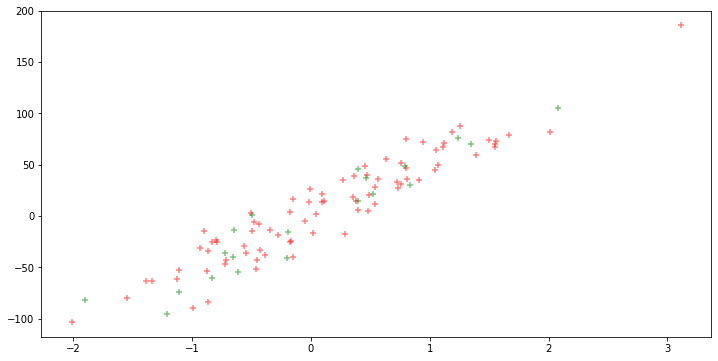

In [21]:
plt.figure(figsize=(12,6))

plt.scatter(X_train,y_train, color='red', alpha=0.5, marker='+', label="Train data")
plt.scatter(X_test,y_test, color='green', alpha=0.5, marker='+', label="Test data")

plt.plot([min(x),max(x)], [ans_num.x[0][1]*min(x)+ans_num.x[0][0] , ans_num.x[0][1]*max(x)+ans_num.x[0][0]], label="Numeryczna", linestyle=":" )

plt.plot([min(x),max(x)], [ans_ana[1]*min(x)+ans_ana[0] , ans_ana[1]*max(x)+ans_ana[0]], label="Analityczna", linestyle=":" )

plt.legend()



### MSE dla danych testowych

In [13]:
y_pred_an = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_an[i] = ans_ana[1]*X_test[i][0]+ans_ana[0]

MSE_an = np.square(np.subtract(y_test, y_pred_an )).mean()

In [14]:
y_pred_num = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_num[i] = ans_num.x[0][1]*X_test[i][0]+ans_num.x[0][0]

MSE_num = np.square(np.subtract(y_test, y_pred_num )).mean()

### Porównanie metody numerycznej i analitycznej

In [15]:
print("MSE dla metody numerycznej: ",MSE_num)
print("MSE dla metody analitycznej:",MSE_an)

MSE dla metody numerycznej:  213.1187988468917
MSE dla metody analitycznej: 213.11879884293793


In [16]:
print("Czas wykonania dla metody numerycznej: ",'{:f}'.format(num_ex_time))
print("Czas wykonania dla metody analitycznej:",'{:f}'.format(ana_ex_time))

Czas wykonania dla metody numerycznej:  0.004891
Czas wykonania dla metody analitycznej: 0.000020


In [17]:
#print("Czas wykonania dla metody numerycznej: ",'{:.3e}'.format(num_ex_time))
#print("Czas wykonania dla metody analitycznej:",'{:.3e}'.format(ana_ex_time))